## Global Sales Data - Exploratory Data Analysis (EDA)
## Author:Sivashyam E

In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

In [4]:
#  Load the Dataset
df = pd.read_csv('5000 Sales Records.csv')
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Australia and Oceania,New Zealand,Household,Offline,C,4/3/2015,217984473,4/20/2015,5305,668.27,502.54,3545172.35,2665974.70,879197.65
4996,Middle East and North Africa,Azerbaijan,Clothes,Offline,L,8/17/2014,169748055,10/2/2014,1077,109.28,35.84,117694.56,38599.68,79094.88
4997,Asia,Myanmar,Baby Food,Offline,H,11/23/2016,226939189,12/10/2016,5204,255.28,159.42,1328477.12,829621.68,498855.44
4998,Europe,Finland,Clothes,Online,L,4/22/2014,906794202,5/11/2014,9410,109.28,35.84,1028324.80,337254.40,691070.40


In [5]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


In [6]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [7]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [8]:

print("\nSample rows:")
print(df.head())


Sample rows:
                              Region               Country  Item Type  \
0  Central America and the Caribbean  Antigua and Barbuda   Baby Food   
1  Central America and the Caribbean                Panama     Snacks   
2                             Europe        Czech Republic  Beverages   
3                               Asia           North Korea     Cereal   
4                               Asia             Sri Lanka     Snacks   

  Sales Channel Order Priority  Order Date   Order ID  Ship Date  Units Sold  \
0        Online              M  12/20/2013  957081544  1/11/2014         552   
1       Offline              C    7/5/2010  301644504  7/26/2010        2167   
2       Offline              C   9/12/2011  478051030  9/29/2011        4778   
3       Offline              L   5/13/2010  892599952  6/15/2010        9016   
4       Offline              C   7/20/2015  571902596  7/27/2015        7542   

   Unit Price  Unit Cost  Total Revenue  Total Cost  Total Profit 

In [10]:
#data cleaning
# Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [11]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
# Check for missing values again
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [14]:
# Feature Engineering
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Total_Profit'] = df['Total Revenue'] - df['Total Cost']
df['Profit_Margin(%)'] = (df['Total_Profit'] / df['Total Revenue']) * 100


In [16]:
#Descriptive Statistics
df.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Shipping_Days,Total_Profit,Profit_Margin(%)
count,5000,5.000000e+03,5000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000
mean,2013-10-19 18:47:31.200000,5.486447e+08,2013-11-13 19:53:28.320000,5030.698200,265.745564,187.494144,1.325738e+06,9.330932e+05,3.926446e+05,25.045800,3.926446e+05,34.073683
min,2010-01-01 00:00:00,1.000909e+08,2010-01-06 00:00:00,2.000000,9.330000,6.920000,6.531000e+01,4.844000e+01,1.687000e+01,0.000000,1.687000e+01,13.558036
25%,2011-12-08 00:00:00,3.201042e+08,2012-01-06 00:00:00,2453.000000,81.730000,35.840000,2.574168e+05,1.547480e+05,8.533925e+04,12.000000,8.533925e+04,25.830654
50%,2013-10-23 00:00:00,5.523150e+08,2013-11-14 12:00:00,5123.000000,154.060000,97.440000,7.794095e+05,4.681807e+05,2.790952e+05,25.000000,2.790952e+05,33.003161
75%,2015-09-08 06:00:00,7.687709e+08,2015-10-03 00:00:00,7576.250000,437.200000,263.330000,1.839975e+06,1.189578e+06,5.651064e+05,38.000000,5.651064e+05,39.768984
max,2017-07-28 00:00:00,9.998797e+08,2017-08-31 00:00:00,9999.000000,668.270000,524.960000,6.672676e+06,5.248025e+06,1.726007e+06,50.000000,1.726007e+06,67.203514
std,NaN,2.594671e+08,NaN,2914.515427,218.716695,176.416280,1.475375e+06,1.150873e+06,3.829351e+05,14.590609,3.829351e+05,12.853472


In [17]:
# Revenue by region
region_sales = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
print('Total Revenue by Region', region_sales)

Total Revenue by Region Region
Sub-Saharan Africa                   1.814567e+09
Europe                               1.703622e+09
Asia                                 9.202771e+08
Middle East and North Africa         7.668678e+08
Central America and the Caribbean    6.849763e+08
Australia and Oceania                5.873641e+08
North America                        1.510143e+08
Name: Total Revenue, dtype: float64


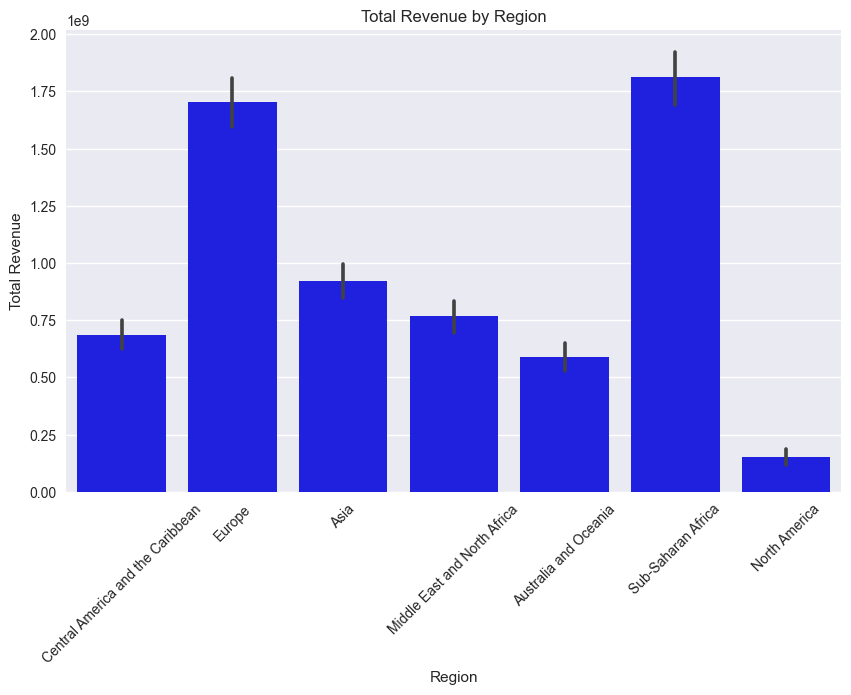

In [21]:
# Data Visualization
# --- Total Revenue by Region ---
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Total Revenue', data=df, estimator=sum,color='blue')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.show()

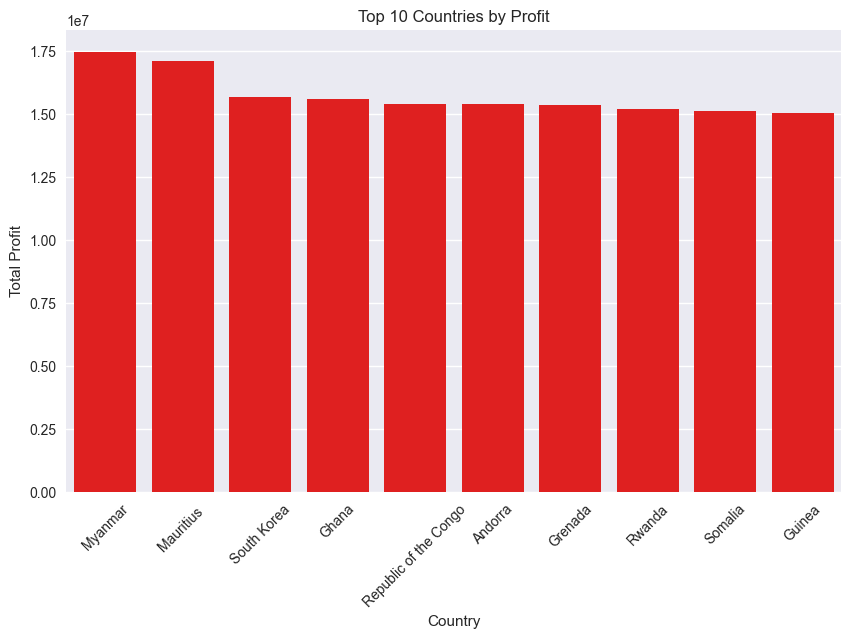

In [22]:
# --- Top 10 Countries by Profit ---
top10 = df.groupby('Country')['Total_Profit'].sum().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10.index, y=top10.values,color='red')
plt.title('Top 10 Countries by Profit')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


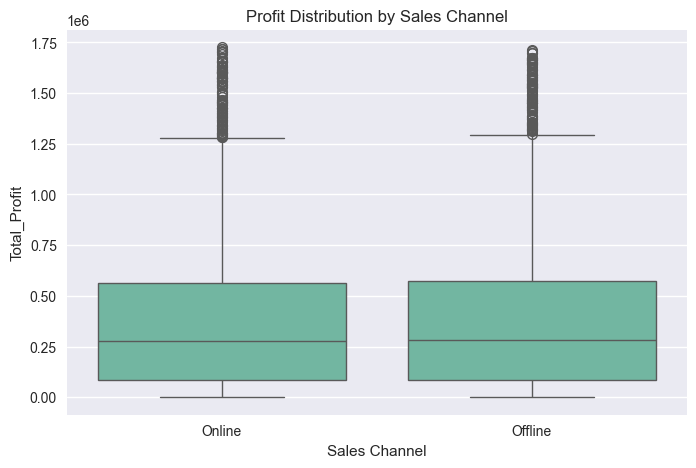

In [23]:
# --- Profit Distribution by Sales Channel ---
plt.figure(figsize=(8,5))
sns.boxplot(x='Sales Channel', y='Total_Profit', data=df)
plt.title('Profit Distribution by Sales Channel')
plt.show()


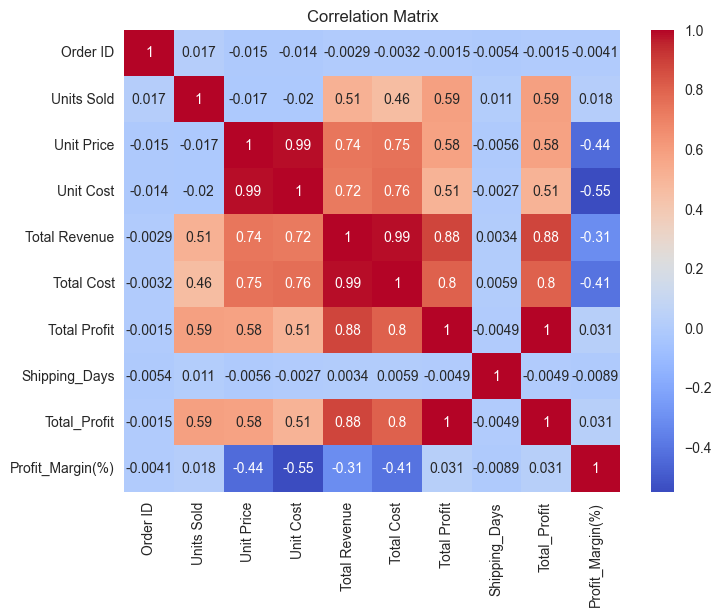

In [24]:
# --- Correlation Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\sivas\AppData\Local\Temp\ipykernel_17508\3507183245.py:9: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\sivas\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


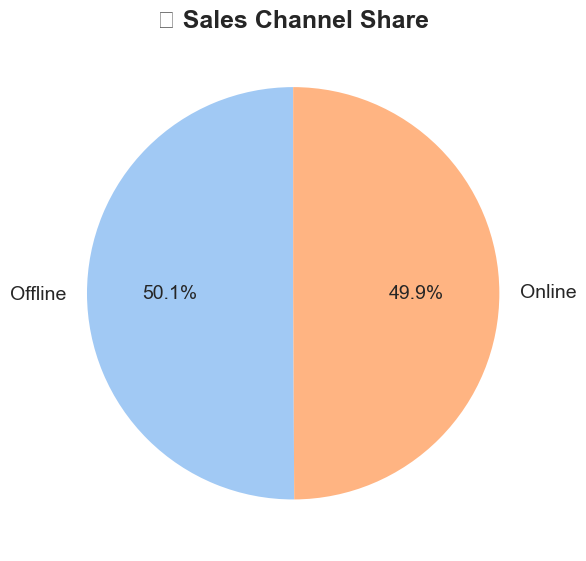

In [34]:
# --- 5. Sales Channel Share ---
plt.figure(figsize=(6,6))
colors = sns.color_palette("pastel")
df['Sales Channel'].value_counts().plot.pie(
    autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize':14}
)
plt.title("🛒 Sales Channel Share", fontsize=18, weight='bold')
plt.ylabel("")
plt.tight_layout()
plt.show()


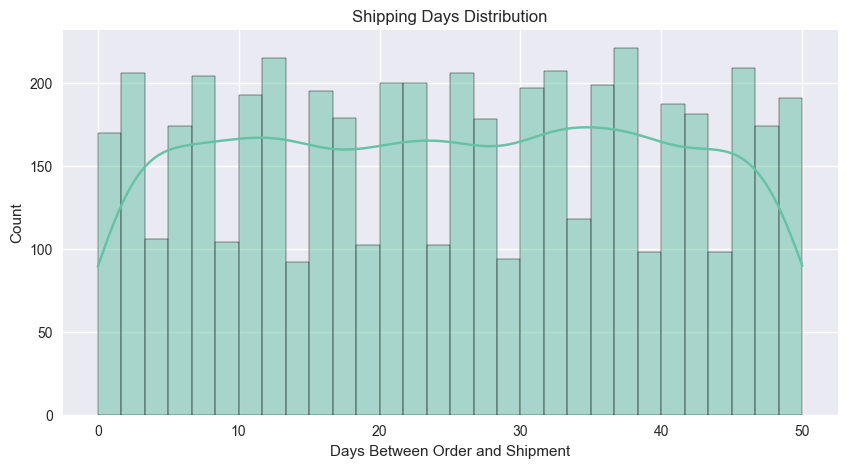

C:\Users\sivas\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128185 (\N{CHART WITH UPWARDS TREND AND YEN SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


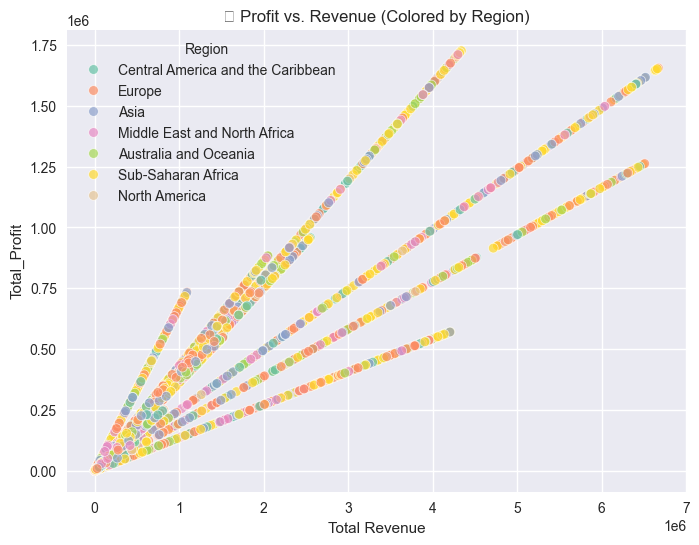

In [27]:
# --- 7. Profit vs. Revenue Scatter Plot ---
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Revenue', y='Total_Profit', hue='Region', data=df, alpha=0.7)
plt.title(' Profit vs. Revenue (Colored by Region)')
plt.show()

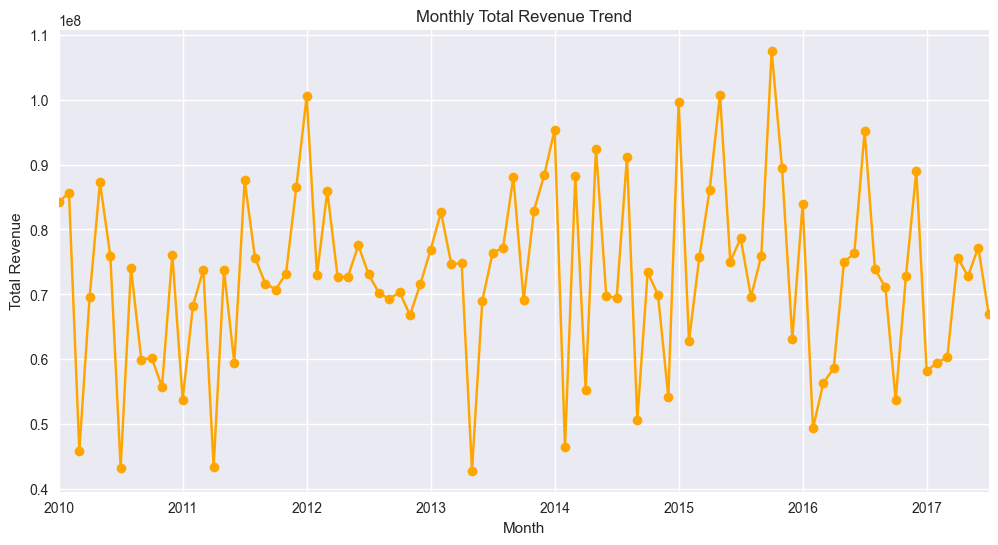

In [32]:
# --- 9. Trend: Monthly Revenue ---
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_revenue = df.groupby('Order Month')['Total Revenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o',color='orange')
plt.title('Monthly Total Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

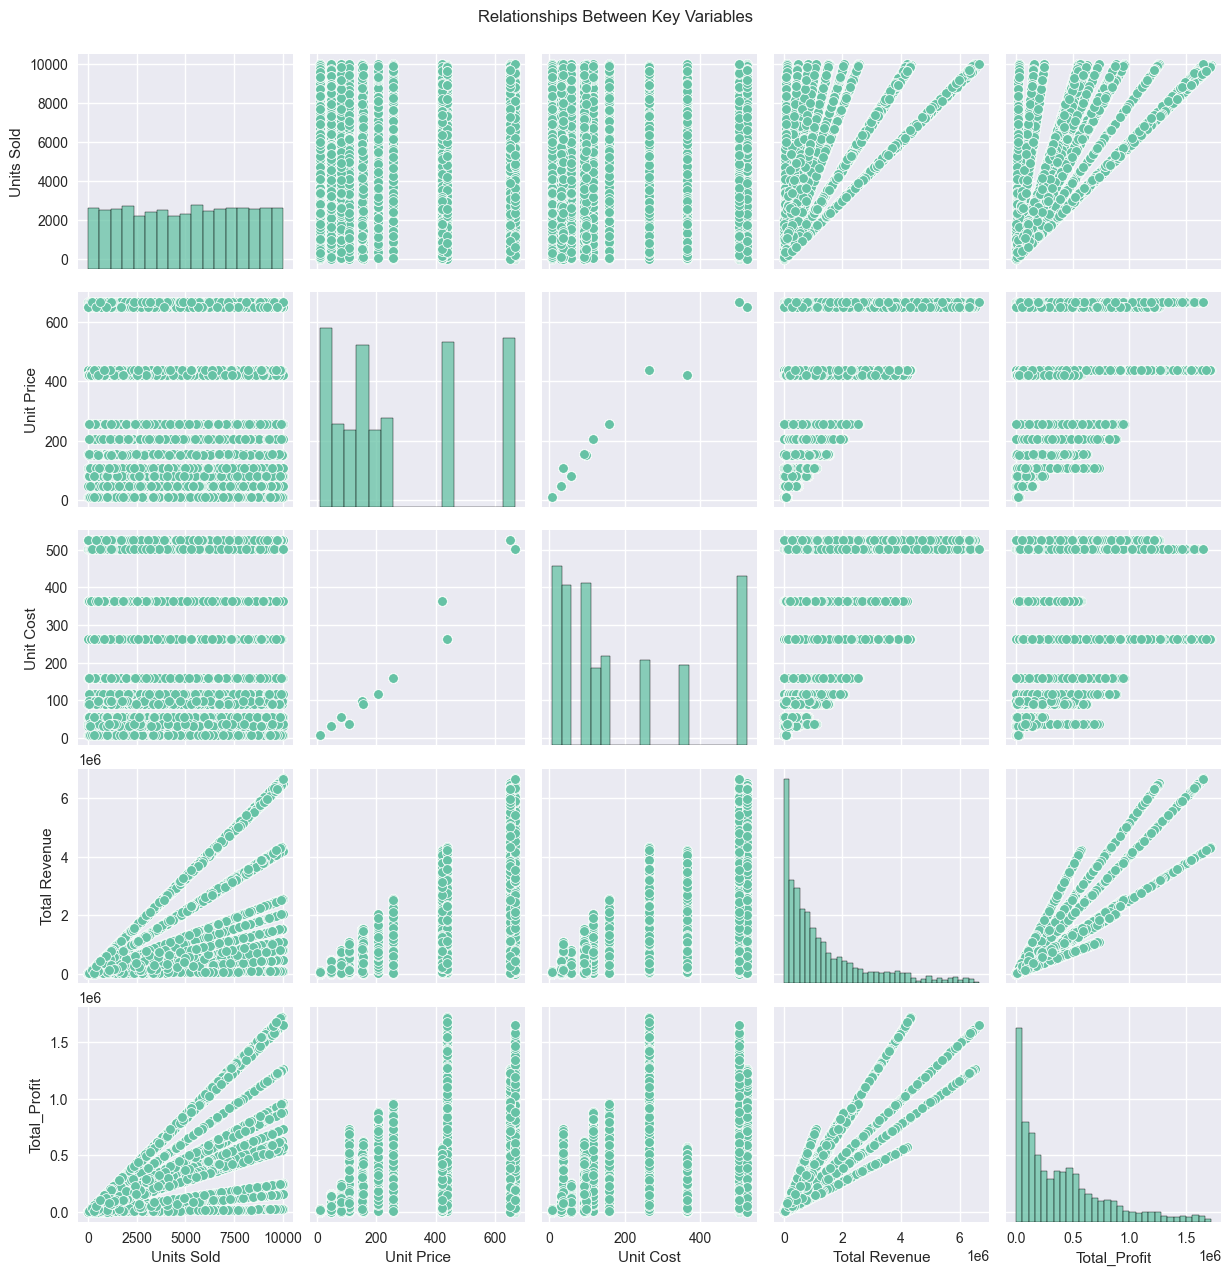

In [31]:
# --- 11. Pairplot for Key Metrics ---
sns.pairplot(df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total_Profit']])
plt.suptitle('Relationships Between Key Variables', y=1.02)
plt.show()